# Importing libraries

In [48]:
from google.colab import files
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image as Img
import cv2
from skimage.transform import resize

In [2]:
# [TEMP] for first time only

# print('making images directory')
# !mkdir images
# print('making results directory')
# !mkdir results

making images directory
making results directory


In [3]:
# [TEMP] for first time only

# !git clone https://github.com/shreyas-bk/U-2-Net

Cloning into 'U-2-Net'...
remote: Enumerating objects: 520, done.
remote: Total 520 (delta 0), reused 0 (delta 0), pack-reused 520
Receiving objects: 100% (520/520), 12.39 MiB | 27.10 MiB/s, done.
Resolving deltas: 100% (234/234), done.


In [10]:
# [TEMP] for first time only

# change to images directory to upload image files
# %cd /content/U-2-Net/images
# uploaded = files.upload()

# change back to U-2-Net directory
# %cd /content/U-2-Net

[Errno 2] No such file or directory: '/content/U-2-Net/images'
/


Saving 2337127678_001.png to 2337127678_001.png


In [6]:
%ls

bin/      dev/   lib32/  opt/         run/   tensorflow-1.15.2/  var/
boot/     etc/   lib64/  proc/        sbin/  tmp/
content/  home/  media/  python-apt/  srv/   tools/
datalab/  lib/   mnt/    root/        sys/   usr/


In [19]:
%ls

data_loader.py  __pycache__/  sample_data/  u2net_test.py
images/         README.md     U-2-Net/      u2net_train.py
model/          results/      u2netp.pth


In [20]:
!python -W ignore u2net_test.py

['/content/images/backgrounds', '/content/images/2337127678_001.png']
Traceback (most recent call last):
  File "u2net_test.py", line 117, in <module>
    main()
  File "u2net_test.py", line 91, in main
    for i_test, data_test in enumerate(test_salobj_dataloader):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 521, in __next__
    data = self._next_data()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1203, in _next_data
    return self._process_data(data)
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1229, in _process_data
    data.reraise()
  File "/usr/local/lib/python3.7/dist-packages/torch/_utils.py", line 434, in reraise
    raise exception
ValueError: Caught ValueError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/_utils/worker.py", line 287, in _worker_loop
    data = fe

In [49]:
# get the names of the images that were uploaded, removing .jpg
image_dir = os.path.join(os.getcwd(), 'images')
names = [name[:-4] for name in os.listdir(image_dir)]
names

['backgro', '.ipynb_checkpo', '2337127678_001']

In [50]:
# this notebook only uses the first of the uploaded images
name = names[2]
name

'2337127678_001'

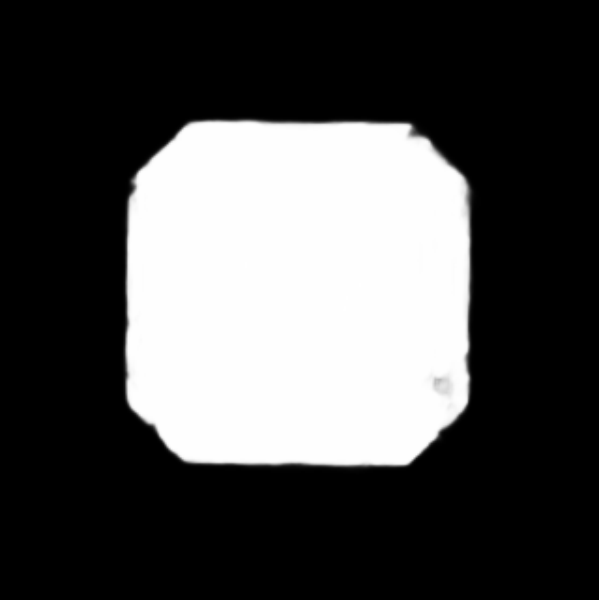

In [51]:
# display result that U-2-Net created
output = load_img('/content/results/'+name+'.png')
display(output)

# Background Removal

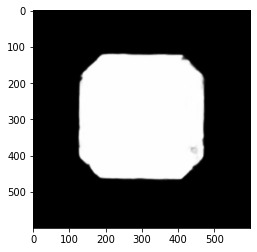

In [52]:
# convert output to numpy array and rescale(255 for RBG images)
RESCALE = 255
out_img = img_to_array(output)
out_img /= RESCALE
import matplotlib.pyplot as plt
plt.imshow(out_img)

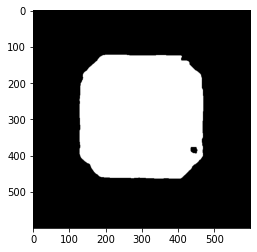

In [53]:
# define the cutoff threshold below which, background will be removed.
THRESHOLD = 0.9

# refine the output
out_img[out_img > THRESHOLD] = 1
out_img[out_img <= THRESHOLD] = 0
plt.imshow(out_img)

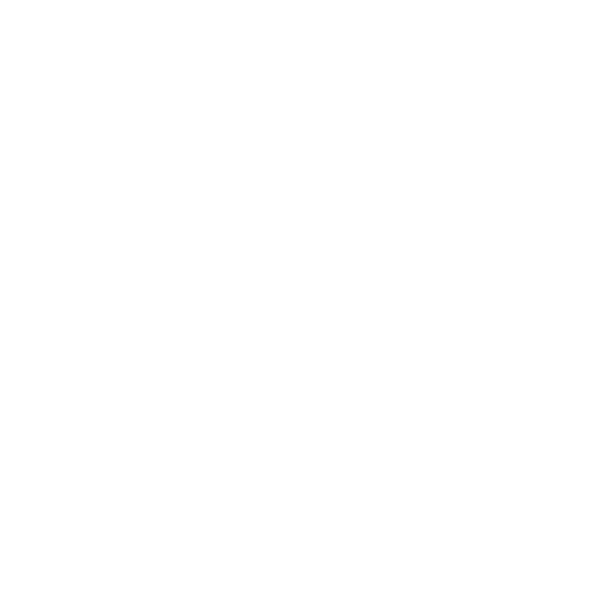

In [54]:
# convert the rbg image to an rgba image and set the zero values to transparent
shape = out_img.shape
a_layer_init = np.ones(shape = (shape[0],shape[1],1))
mul_layer = np.expand_dims(out_img[:,:,0],axis=2)
a_layer = mul_layer*a_layer_init
rgba_out = np.append(out_img,a_layer,axis=2)
display(Img.fromarray((rgba_out*RESCALE).astype('uint8'), 'RGBA'))

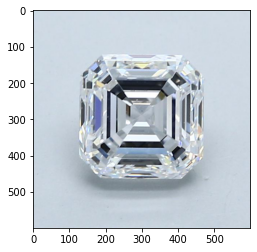

In [55]:
# load and convert input to numpy array and rescale(255 for RBG images)
input = load_img('/content/images/'+name+'.png')
inp_img = img_to_array(input)
inp_img /= RESCALE
plt.imshow(inp_img)

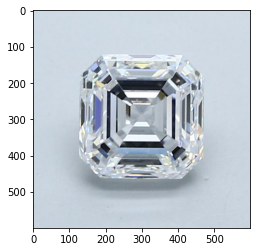

In [56]:
# since the output image is rgba, convert this also to rgba, but with no transparency
a_layer = np.ones(shape = (shape[0],shape[1],1))
rgba_inp = np.append(inp_img,a_layer,axis=2)
plt.imshow(rgba_inp)

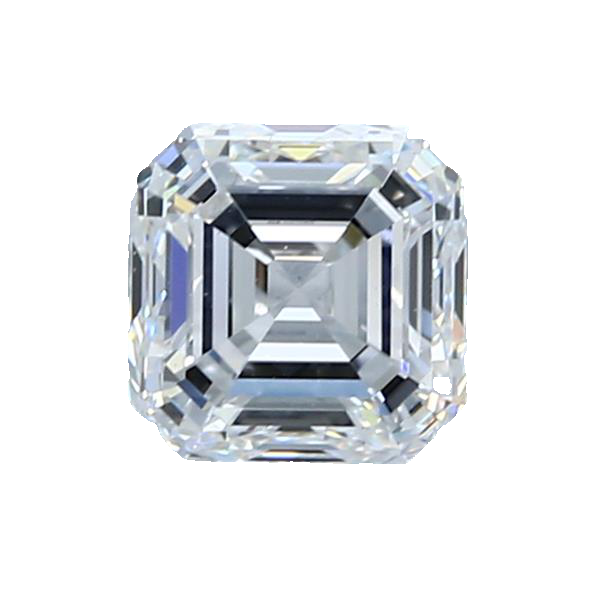

In [57]:
# simply multiply the 2 rgba images to remove the backgound
rem_back = (rgba_inp*rgba_out)
rem_back_scaled = Img.fromarray((rem_back*RESCALE).astype('uint8'), 'RGBA')
display(rem_back_scaled)
# --same, but using cv2--
#rem_back_cv = rem_back[:,:,[2,1,0,3]]
#from google.colab.patches import cv2_imshow
#cv2_imshow(rem_back_cv*RESCALE)

In [61]:
%pwd
%ls

2337127678_001_background_changed.png  model/        U-2-Net/
2337127678_001_background_removed.png  __pycache__/  u2netp.pth
backgrounds/                           README.md     u2net_test.py
data_loader.py                         results/      u2net_train.py
images/                                sample_data/


In [63]:
# save the resulting image to colab
rem_back_scaled.save('./results/'+name+'_background_removed.png')

In [59]:
# download the result
files.download('/content/'+name+'_background_removed.png')

FileNotFoundError: ignored

# Change Background

In [35]:
# # TEMP
# # change to images directory
# %cd /content/U-2-Net/images

# # make a new directory for the backgrounds
# !mkdir backgrounds
# %cd /content/U-2-Net/images/backgrounds

# # upload image files
# uploaded = files.upload()

# # change back to U-2-Net directory
# %cd /content/U-2-Net

[Errno 2] No such file or directory: '/content/U-2-Net/images'
/content
[Errno 2] No such file or directory: '/content/U-2-Net/images/backgrounds'
/content


KeyboardInterrupt: ignored

In [37]:
%ls

2337127678_001_background_removed.png  __pycache__/  u2netp.pth
backgrounds/                           README.md     u2net_test.py
data_loader.py                         results/      u2net_train.py
images/                                sample_data/
model/                                 U-2-Net/


In [64]:
# get the names of the images that were uploaded, removing .jpg
image_dir = os.path.join(os.getcwd(), 'images/backgrounds')
backgrounds = [background[:-4] for background in os.listdir(image_dir)]
backgrounds

['black_bg']

In [65]:
# this notebook only uses the first of the uploaded images
background = backgrounds[0] # `black_bg.png`
background

'black_bg'

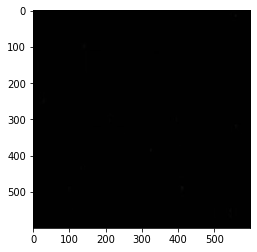

In [66]:
# load and convert background to numpy array and rescale(255 for RBG images)
background_input = load_img('/content/images/backgrounds/'+background+'.png')
background_inp_img = img_to_array(background_input)
background_inp_img /= RESCALE
plt.imshow(background_inp_img)

In [67]:
# get dimensions of background (original image will be resized to dimensions of background image in this notebook)
background_height = background_inp_img.shape[0]
background_width = background_inp_img.shape[1]
background_height,background_width

(600, 599)

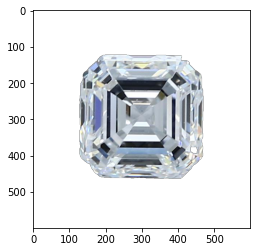

In [68]:
# resize the image
resized_rem_back  = resize(rem_back, (background_height,background_width))
plt.imshow(resized_rem_back)

In [69]:
# create a new array which will store the final result
output_chbg = np.zeros((background_height, background_width, 3))
output_chbg.shape

(600, 599, 3)

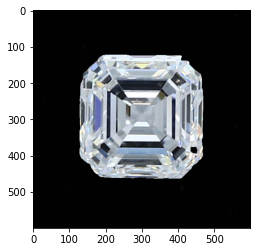

In [70]:
# using the following o[c] = b[c]*(1-i[t])+i[c] {where o - output image, c - channels from 1-3, i - input image with background removed, t - transparent channel}, obtain values for the final result
output_chbg[:,:,0] = background_inp_img[:,:,0]*(1-resized_rem_back[:,:,3])+resized_rem_back[:,:,0]
output_chbg[:,:,1] = background_inp_img[:,:,1]*(1-resized_rem_back[:,:,3])+resized_rem_back[:,:,1]
output_chbg[:,:,2] = background_inp_img[:,:,2]*(1-resized_rem_back[:,:,3])+resized_rem_back[:,:,2]
plt.imshow(output_chbg)

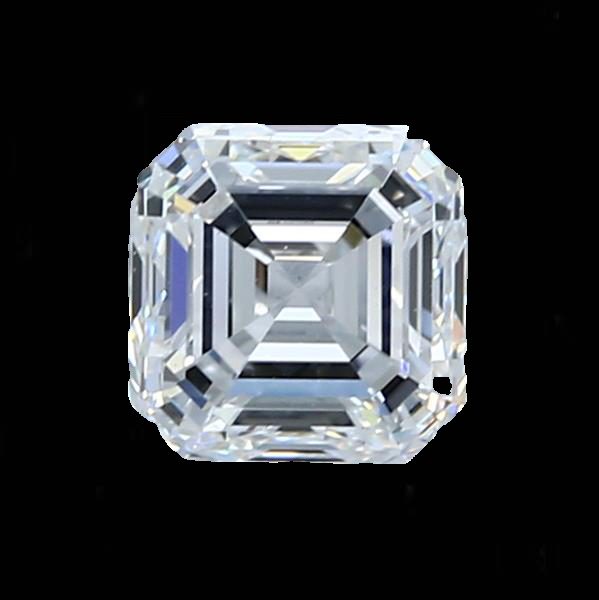

In [71]:
# rescale
output_chbg_scaled = Img.fromarray((output_chbg*RESCALE).astype('uint8'), 'RGB')
display(output_chbg_scaled)

In [72]:
# save the resulting image to colab
output_chbg_scaled.save('./results/'+name+'_background_changed.png')